<a href="https://colab.research.google.com/github/IslombekTurakulov/NotebookWorks/blob/add-license-1/TurakulovIslombek_Calculus_16_2020_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
from sympy import S, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [6]:
from sympy.abc import x, y

def func(x, y):
  return x**2 - x*y - 2*y**2
def grad_func(func, *var):
  return Matrix([func(*var).diff(variable) for variable in var])
def grad_func_point(func, var_dict):
  return grad_func(func, *var_dict.keys()).subs(var_dict)

grad_temp = grad_func_point(func, {x:1, y:2})
display(grad_func(func, x, y))
display(grad_temp, grad_temp.dot(Matrix((Cos(sympy.pi/3), Sin(sympy.pi/3)))))

Matrix([
[ 2*x - y],
[-x - 4*y]])

Matrix([
[ 0],
[-9]])

-9*sqrt(3)/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

2

2

Eq(z - 1, 2*x + 2*y - 2)

Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

Eq(z, 2*x + 2*y - 1)

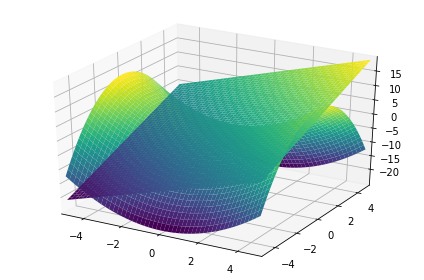

In [16]:
from sympy.abc import x, y, z

M = Point(2, -1, 1)
dictM = {x: M.x, y: M.y, z: M.z}
func = (x**2)/(2) - (y**2)

fdx, fdy = [func.diff(p).subs(dictM) for p in [x, y]]
display(fdx, fdy)

temp_func = sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate = False)
planeM = sympy.Eq(z - M.z, fdx*(x- M.x) + fdy*(y- M.y))
norm_line = sympy.Eq(temp_func, (z - M.z)/(-1), evaluate = False)

display(planeM, norm_line)
display(sympy.Eq(z, solve(planeM, z)[0]))
plot3d(solve(planeM, z)[0], f, (x, -5, 5), (y, -5, 5))

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

In [15]:
from sympy.abc import a, x, y, z, v

M = Point(0, a, v)
dictM = {x: M.x, y:M.y, z:M.z}
F = 3*x*y*z - z**3 - a**3
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]

planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
temp_func = sympy.Eq((x - M.x)/Fdx, (y- M.y)/Fdy, evaluate = False)
norm_line = sympy.Eq(temp_func, 
                     (z - M.z)/Fdz, evaluate = False)

display(Fdx, Fdy, Fdz)
display(planeM, norm_line)

3*a*v

0

-3*v**2

Eq(3*a*v*x - 3*v**2*(-v + z), 0)

Eq(Eq(x/(3*a*v), zoo*(-a + y)), -(-v + z)/(3*v**2))



```
# Выбран кодовый формат
```

### Индивидуальное задание. 139
Поверхность задана уравнением $x^2+4x+y^2+z^2=0$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=-2$, $\alpha= 1.68\pi$.

In [12]:
from sympy.abc import x, y, z
alpha = 1.68*sympy.pi
R = -2
M = Point(R*Cos(alpha), R*Sin(alpha), R)

dictM = {x: M.x, y:M.y, z:M.z}
F = x**2 + 4*x + y**2 + z**2

Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx.simplify(), Fdy.simplify(), Fdz.simplify())
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)


temp_line = sympy.Eq(((x - M.x)/Fdx).simplify(), ((y- M.y)/Fdy).simplify(), evaluate = False)
norm_line = sympy.Eq(temp_line, 
                     (z - M.z)/Fdz, evaluate = False)

display(planeM.simplify(), norm_line)

4 - 4*cos(8*pi/25)

4*sin(8*pi/25)

-4

Eq(x*(1 - sin(9*pi/50)) + y*cos(9*pi/50) - z, 4 - 2*sin(9*pi/50))

Eq(Eq((x + 2*cos(8*pi/25))/(4*(1 - cos(8*pi/25))), y/(4*cos(9*pi/50)) - 1/2), -z/4 - 1/2)

-sqrt(-x**2 - 4*x - y**2)

sqrt(-x**2 - 4*x - y**2)

-x*sin(9*pi/50) + x + y*cos(9*pi/50) - 4 + 2*sin(9*pi/50)

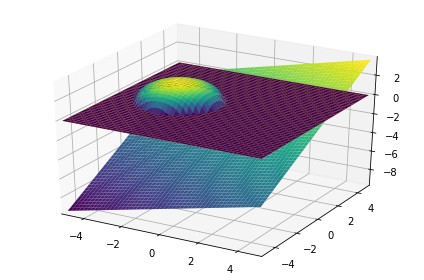

In [13]:
first, second = list(solve(F, z))
third = (M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y))).simplify()
first, second = first.simplify(), second.simplify()
display(first, second, third)
plot3d(first, second, third, (x, -5, 5), (y, -5, 5))